# Obejctives:
- split train and test data, label to be trained is a 'number of audiences'
- create RMSLE function to evaluate the result
- make a sample prediction of 'number of audiences' label with inputs of ['Month','Film Distributor Company','Content Rating','Genre','Director','Actor','Year']

## Split train and test data

In [11]:
import pandas as pd
csv = pd.read_csv('./Data/seven.csv')
csv_data = csv[['월','개별배급사_index','등급_index','개별장르_index','개별감독_index','개별배우_index','누적관객수','관객수','스크린수','년']]
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split


# train and test data
train_data, test_data = train_test_split(csv_data)

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [13]:
# train data
train = train_data
test = test_data

In [14]:
categorical_feature_name = ['월','개별배급사_index','등급_index','개별장르_index','개별감독_index','개별배우_index','년']
for i in categorical_feature_name:
    train[i] = train[i].astype('category')
    
# Features that are going to be used 
feature_name = ['월','개별배급사_index','등급_index','개별장르_index','개별감독_index','개별배우_index','년']

## Train data with a label 'number of audiences'

In [15]:
#label is a 'number of audiences'

X_train = train[feature_name]
X_test = test[feature_name]
label_name = '누적관객수'
Y_train = train[label_name]

## Create a function for Root Mean Square Logarithmic Error (RMSLE) 

In [16]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)

    # change data structure to numpy array
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # add one each to the predicted value and the real value and then put a log on it
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # subtract the actual log value from the predicted log value and then square it.
    difference = log_predict - log_actual
    difference = np.square(difference)

    # make an average of the array
    mean_difference = difference.mean()

    # put a square root on it
    score = np.sqrt(mean_difference)

    return score

In [17]:
rmsle_scorer = make_scorer(rmsle)

In [18]:
# find the RMSLE value for the Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(Y_train)
rfModel.fit(X_train, y_train_log)

preds = rfModel.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds),False)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.06223033936937603


## Sample Prediction using trained model

What is the estimated number of audiences of a movie distributed by (주)시네마서비스(number 28 company), content rating of General audiences(G=4), genre of crime (4), directed by 김상진(number 133 director), casted 설경구(number 90 actor) in June 2002.

prediction: 13 people
Considering that the film distributing company was small and now defunct, and director is almost unknown, the prediction seems little excessive but still

In [21]:
# feature_name = ['월','개별배급사_index','등급_index','개별장르_index','개별감독_index','개별배우_index','년']


rfModel.predict([[5.0, 1.0, 1.0, 1.0, 1.0, 1.0,  2005.0]])

array([14.7776751])

In [10]:
csv_data.head()

,월,개별배급사_index,등급_index,개별장르_index,개별감독_index,개별배우_index,누적관객수,관객수,스크린수,년
0,1.0,0.0,0.0,0.0,0.0,0.0,16264806.0,16264806,2003.0,2019.0
1,1.0,0.0,0.0,0.0,0.0,1.0,16264806.0,16264806,2003.0,2019.0
2,1.0,0.0,0.0,0.0,0.0,2.0,16264806.0,16264806,2003.0,2019.0
3,1.0,0.0,0.0,0.0,0.0,3.0,16264806.0,16264806,2003.0,2019.0
4,1.0,0.0,0.0,0.0,0.0,4.0,16264806.0,16264806,2003.0,2019.0


In [22]:
csv1 = csv.groupby(csv['월']).mean()
csv1 = csv1.drop(['순위','누적매출액','스크린수', '개별배급사_index','등급_index','개별장르_index','개별감독_index','개별배우_index','년'],axis=1)

In [23]:
import matplotlib.pyplot as plt
csv1

,누적관객수
월,
1.0,2.195987e+06
2.0,2.105899e+06
3.0,1.102264e+06
4.0,1.127760e+06
5.0,2.635156e+06
6.0,1.913315e+06
7.0,5.979037e+06
8.0,3.100607e+06
9.0,3.027004e+06


<BarContainer object of 12 artists>

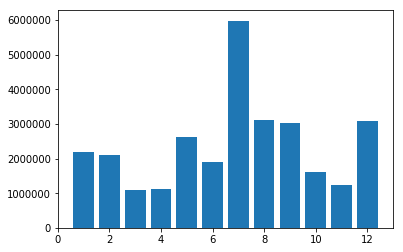

In [24]:
plt.bar(csv1.index, csv1['누적관객수'])

In [25]:
csv1.to_csv("./Data/month_spectators.csv", index=True)

# final.csv로 하기 

In [1]:
import pandas as pd
final = pd.read_csv('./Data/oneoneone.csv')

In [2]:
final.columns

Index(['순위', '영화명', '매출액', '누적매출액', '관객수', '누적관객수', '스크린수', '개별배급사', '등급',
       '개별장르', '개별감독', '개별배우', '월', '년', '개별배급사_index', '등급_index',
       '개별장르_index', '개별감독_index', '개별배우_index', '일_index'],
      dtype='object')

In [3]:
# final1 = final.groupby(final['개별배우', '누적관객수']).max()
final1=final[['등급','누적관객수']].groupby('등급').mean().reset_index()
# final1 = final1.drop(['년','월','순위','누적매출액','스크린수', '개별배급사_index','등급_index','개별장르_index','개별감독_index','개별배우_index', '매출액', '관객수', '일_index'],axis=1)
# final1.sort_values(by='누적관객수' , ascending=False, inplace=True)
final1

,등급,누적관객수
0,12세관람가,3.075251e+06
1,15세관람가,2.907091e+06
2,18세관람가,1.848316e+06
3,전체관람가,8.259883e+05


In [102]:
# final1.to_csv('./Data/oneoneone_distributors_spectators.csv', index=False)

<BarContainer object of 4 artists>

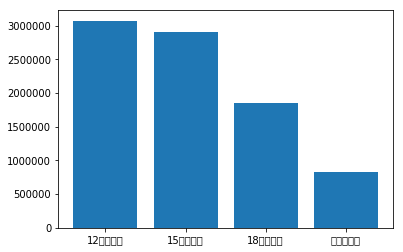

In [5]:
import matplotlib.pyplot as plt
plt.bar(final1['등급'], final1['누적관객수'])

In [117]:
final1.to_csv('./Data/oneoneone_rating_spectators.csv', index=False)